# The Metric

Everybody knows that violent crime scares away rich people. Additionally, it's hard to stay rich when you keep getting robbed of all your money :(. Most of all, a low crime count is integral to money-making. According to Maslow's hierarchy of needs, one cannot be motivated to make money without first having both physical and psychological safety. Hence, we made crime count a factor when choosing the best neighborhood.

![](https://i.imgur.com/fXcvTDx.png)

[Police Incident Blotter (30 Day) Dataset](https://data.wprdc.org/dataset/police-incident-blotter)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

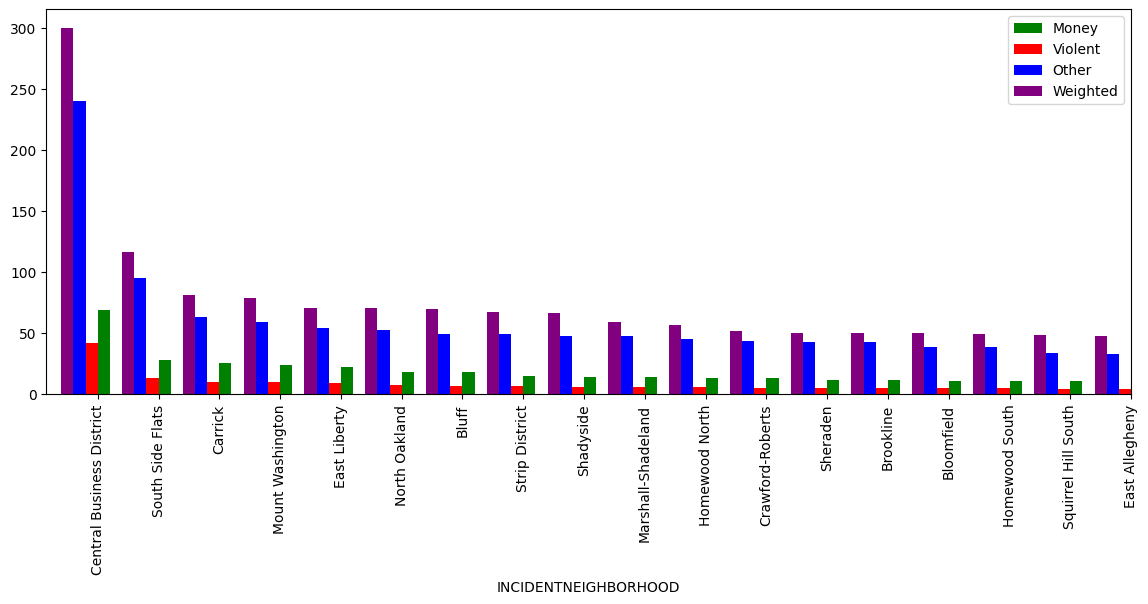

In [2]:
data = pd.read_csv("../datasets/crime.csv")
crime_count = data["INCIDENTNEIGHBORHOOD"].value_counts()

# The violent crimes array was generated with the help of ChatGPT-3.5 after providing it with the ouput of data["INCIDENTHIERARCHYDESC"].unique()
violent_crimes = ['AGG-ASSAULT', 'AGG. INDECENT ASSAULT W/ UNCONSCIOUS PERSON', 'CRIMINAL HOMICIDE', 'INDECENT ASSAULT',
                  'RAPE', 'RECKLESSLY ENDANGER ANOTH PER', 'ROBBERY', 'ROBBERY OF MOTOR VEHICLE', 'SEXUAL ASSAULT', 'SIMPLE ASSAULT']
violent_data = data[data["INCIDENTHIERARCHYDESC"].isin(violent_crimes)]
violent_crime_count = violent_data["INCIDENTNEIGHBORHOOD"].value_counts()

# The money crimes array was generated with the help of ChatGPT-3.5 after providing it with the ouput of data["INCIDENTHIERARCHYDESC"].unique()
money_crimes = ['BAD CHECKS', 'BURGLARY', 'CREDIT CARDS', 'FORGERY', 'FOUND PROPERTY', 'GAMBLING INVESTIGATION', 'LOST PROPERTY', 'RECEIVING STOLEN PROPERTY',
                'RETSIL THEFT (SHOPLIFTING)', 'STOLEN PROPERTY - OTHER', 'THEFT', 'THEFT BY DECEPTION', 'THEFT BY EXTORTION', 'THEFT FROM AUTO', 'THEFT OF SERVICES']
money_data = data[data["INCIDENTHIERARCHYDESC"].isin(money_crimes)]
money_crime_count = money_data["INCIDENTNEIGHBORHOOD"].value_counts()

other_data = data[~data["INCIDENTHIERARCHYDESC"].isin(violent_crimes + money_crimes)]
other_crime_count = other_data["INCIDENTNEIGHBORHOOD"].value_counts()

weighted_crimes = crime_count.to_dict()
for k, v in violent_crime_count.items():
    weighted_crimes[k] = v * 1
for k, v in money_crime_count.items():
    weighted_crimes[k] += v * 2
for k, v in other_crime_count.items():
    weighted_crimes[k] += v * 0.5

weighted_crime_count = pd.Series(weighted_crimes)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()

money_crime_count.nlargest(18).plot(kind='bar', color='green', ax=ax, width=0.2, position=0)
violent_crime_count.nlargest(18).plot(kind='bar', color='red', ax=ax, width=0.2, position=1)
other_crime_count.nlargest(18).plot(kind='bar', color='blue', ax=ax, width=0.2, position=2)
weighted_crime_count.nlargest(18).plot(kind='bar', color='purple', ax=ax, width=0.2, position=3)

ax.legend(["Money", "Violent", "Other", "Weighted"])
plt.xticks(rotation=90)
plt.show()

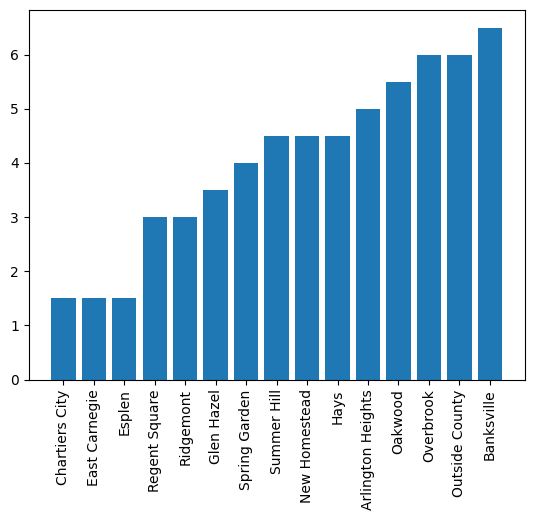

In [3]:
fig, ax = plt.subplots()
plt.bar(weighted_crime_count.nsmallest(15).index, weighted_crime_count.nsmallest(15).values)
plt.xticks(rotation=90)
plt.show()

### Conclusion

Going purely by the metric of crime level, the best neighborhood in Pittsburgh would have to be one of either Charitiers, East Carnegie, or Esplen, which all had a weighted crime count of 1.5. However, this is not a accurate metric to go by since it doesn't account for population density. So going by a purely data driver approach won't be enough in this case.

As previously mentioned, the reason we chose this submetric was because an integral part of money-making is basic physical and psychological safety (as stated by Maslow's Hierarchy of Needs). Therefore, the best neighborhood doesn't need to be absolutely safe, just safe enough that one can be comfortable. So, I decided to use my personal favorite neighbourhood, Point Breeze, as the best neighbourhood for this submetric. It has a weighted crime count of 16.5 and is the neighbourhood with the 44th lowest weighted crime count, placing in the top 50%.

I have not been to many neighbourhoods in Pittsburgh, and of the ones I've been to, I couldn't name most. However, Point Breeze is my favorite because of its vibe. And you know what contributes to the vibe? Safety. So, while the data driven approach may not tell me what the best neighbourhood is, it does tell me what the best neighbourhood could be.

I could have just as easily chosen another neighbourhood such as Friendship or South Shore, which both have lower weighted crime counts. I'm saying this to emphasize that this submetric will be used as an exclusionary one. If the crime count is too high, we won't consider the neighbourhood when choosing our best overall neighbourhood. We will set the exlusion point to be the worst 20% of neighbourhoods in Pittsburgh by weighted crime count.

The first bar plot displays the 18 worst neighbourhoods by weighted crime count (this makes up the worst 20%). So none of those neighbourhoods can be the best.